![Titanic](tit.jpg) 



In [2]:
#  ____        _        
# |  _ \  __ _| |_ __ _ 
# | | | |/ _` | __/ _` |
# | |_| | (_| | || (_| |
# |____/ \__,_|\__\__,_|
#
# Data Analysis Project by [Mohammed M Darwish]


### Column Descriptions

- **PassengerId**: A unique identifier for each passenger.
- **Survived**: Survival status (0 = Did not survive, 1 = Survived).
- **Pclass**: Passenger class (1 = First Class, 2 = Second Class, 3 = Third Class).
- **Name**: The full name of the passenger.
- **Sex**: Gender of the passenger (male or female).
- **Age**: Age of the passenger in years (NaN indicates missing data).
- **SibSp**: Number of siblings or spouses aboard the Titanic.
- **Parch**: Number of parents or children aboard the Titanic.
- **Ticket**: Ticket number assigned to the passenger.
- **Fare**: The fare paid for the ticket in British pounds.
- **Cabin**: Cabin number where the passenger stayed (NaN indicates missing data).
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as plt
import warnings

In [2]:
sns.set_style('darkgrid')
sns.set_palette("flare")
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('Titanic.csv')

In [4]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
594,595,0,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,NaN,S
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
635,636,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,NaN,S
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q
681,682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
799,800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S
320,321,0,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.2500,NaN,S


In [8]:
# cheack the data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# The data types are accurate.
#Check for duplicates now.
df.duplicated().sum()

0

In [11]:
#cheak for nulls.
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#We can delete the cabin column as it appears to have a lot of null entries,
#but we're keeping it there in case it points to something.The illegal Passengers     
#check for cardinalty columns then erase them as a result.
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [13]:
df.drop(['PassengerId','Name', 'Ticket'],axis=1,inplace=True)

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [15]:
df[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Although there is a noticeable bias towards younger people, this dataset appears to reflect a mix of persons from all age groups and socioeconomic backgrounds. With many lower rates and a few expensive outliers, the fare distribution reveals socioeconomic disparities among travelers.

The dataset appears to include people from a variety of backgrounds, most likely with a stratified socioeconomic structure characteristic of that era, based on the diversity in fare pricing and age distributions.



In [17]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [18]:
round(df['Survived'].value_counts(normalize=True),2)

Survived
0    0.62
1    0.38
Name: proportion, dtype: float64

In [19]:
df['Survived'].replace(
    {
        0:'died',
        1:'survived'
    }
,inplace=True)

In [20]:
round(df['Pclass'].value_counts(normalize=True),2)

Pclass
3    0.55
1    0.24
2    0.21
Name: proportion, dtype: float64

In [22]:
round(df['Embarked'].value_counts(normalize=True),2)

Embarked
S    0.72
C    0.19
Q    0.09
Name: proportion, dtype: float64

In [23]:
df['Embarked'].replace({'S':'Southampton', 'C':'Cherbourg', 'Q':'Queenstown'},inplace=True)

In [24]:
round(df['Sex'].value_counts(normalize=True),2)

Sex
male      0.65
female    0.35
Name: proportion, dtype: float64

# Survived amount gender with embraked and p-class

In [26]:
pivot_table = pd.pivot_table(
    data=df,
    values='Survived',
    index='Sex',
    columns=['Pclass', 'Embarked'],
    aggfunc='count', 
    margins=True, 
    margins_name='Total'  
)
pivot_table

Pclass           1                                2                         \
Embarked Cherbourg Queenstown Southampton Cherbourg Queenstown Southampton   
Sex                                                                          
female          43          1          48         7          2          67   
male            42          1          79        10          1          97   
Total           85          2         127        17          3         164   

Pclass           3                        Total  
Embarked Cherbourg Queenstown Southampton        
Sex                                              
female          23         33          88   312  
male            43         39         265   577  
Total           66         72         353   889

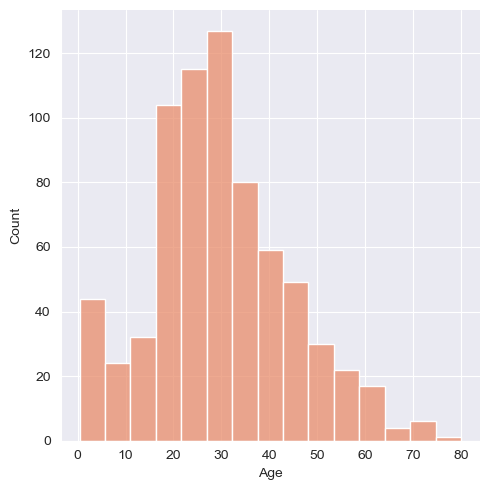

In [27]:
sns.displot(data=df,x='Age',bins=15)

In [28]:
surv_df=df.groupby('Survived')['Survived'].count()

([<matplotlib.patches.Wedge at 0x1bc90af9ca0>,
 [Text(-0.4282635655630454, 1.1209773942463013, 'died'),
  Text(0.42826367051652175, -1.1209773541493675, 'survived')],
 [Text(-0.24982041324510978, 0.6539034799770089, '61.6%'),
  Text(0.249820474467971, -0.6539034565871309, '38.4%')])

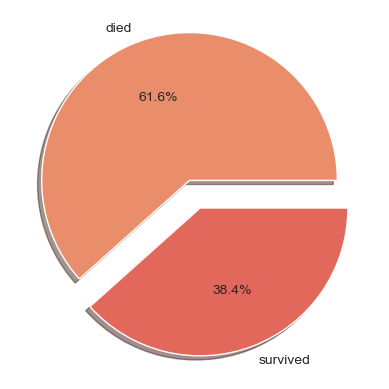

In [29]:
plt.pie(x=surv_df.values,labels=surv_df.index,shadow=True,explode=[0.1,0.1],autopct='%0.1f%%')

# The age-related financial status of passengers and their chances of survival.

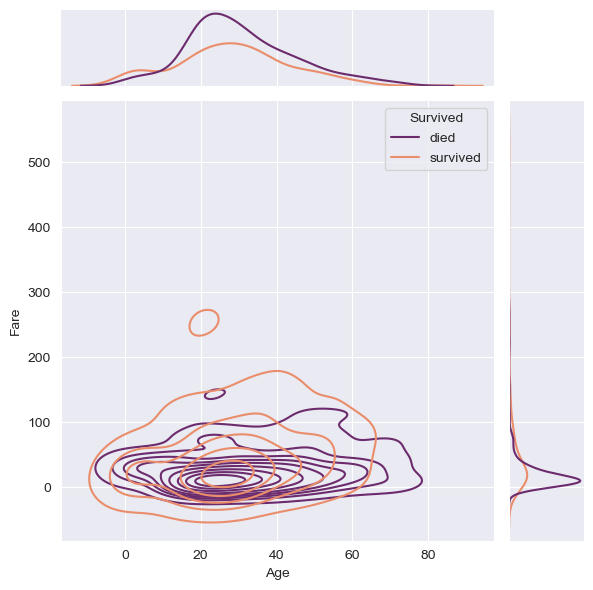

In [31]:
sns.jointplot(x='Age', y='Fare', data=df, kind='kde', hue='Survived', palette={'survived': '#e98d6b', 'died': '#6c2b6d'})

# The age-related gender of passengers and their chances of survival.
# It can also give outlier spread.

<Axes: xlabel='Survived', ylabel='Age'>

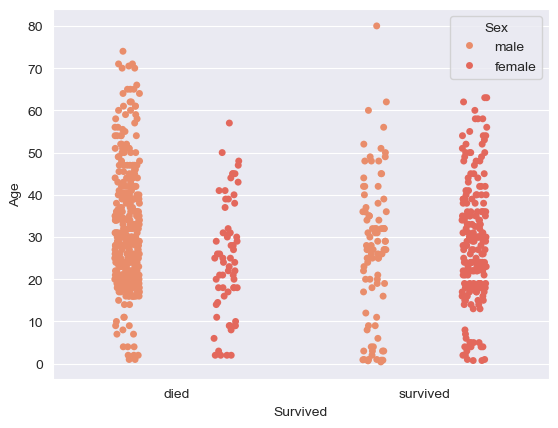

In [33]:
sns.stripplot(x='Survived',y='Age',data=df, hue='Sex', dodge=True)

# Embarked and gender distributions

<Axes: xlabel='Embarked', ylabel='count'>

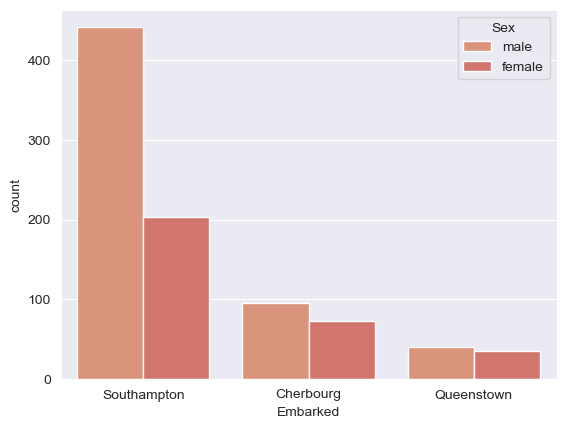

In [35]:
sns.countplot(data=df,x='Embarked',hue='Sex', dodge=True)

# P-class and gender distributions and chances of survival.

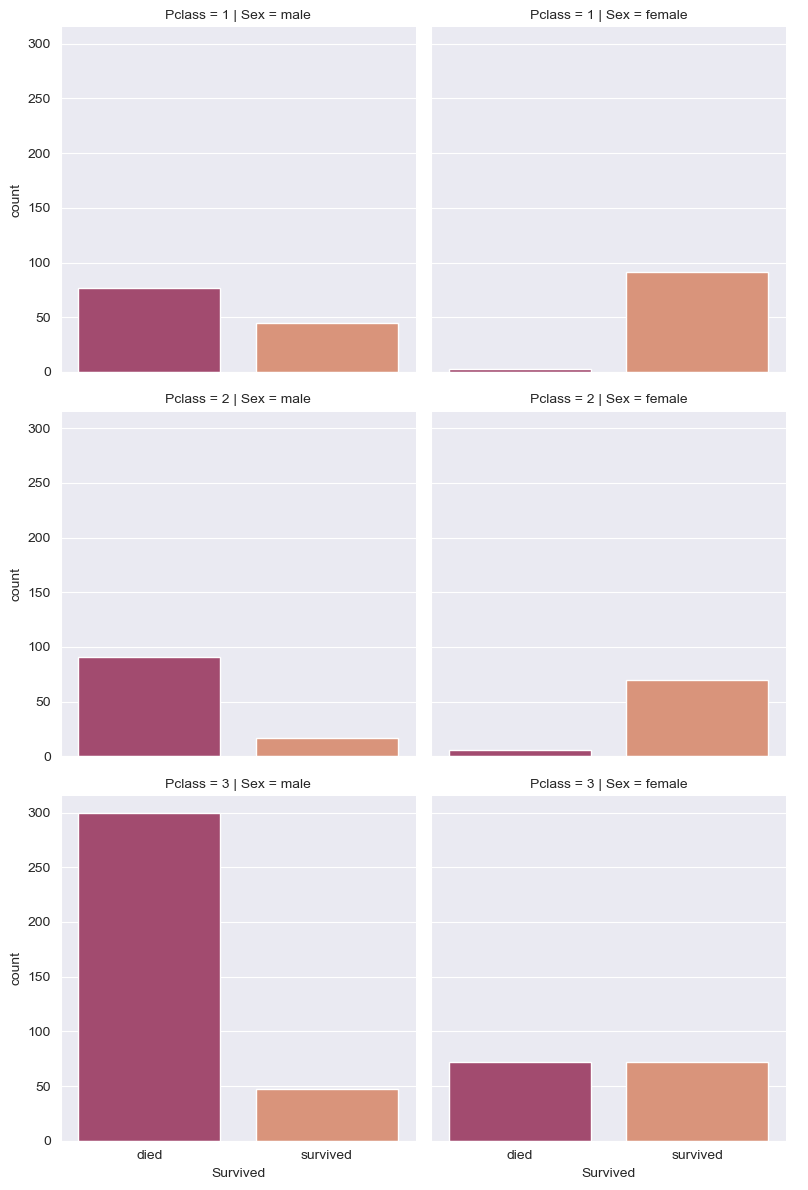

In [37]:
custom_palette={'died':'#b13c6c', 'survived':'#e98d6b'}
titanc_fg = sns.FacetGrid(df, col='Sex',row='Pclass',  height=4)
titanc_fg.map(sns.countplot,'Survived',order=['died', 'survived'],palette=custom_palette)
titanc_fg.add_legend()


In [66]:
df.to_csv('T_F.csv')